### Nuclei plots (CP best segmentation pipeline VS raw annotations)

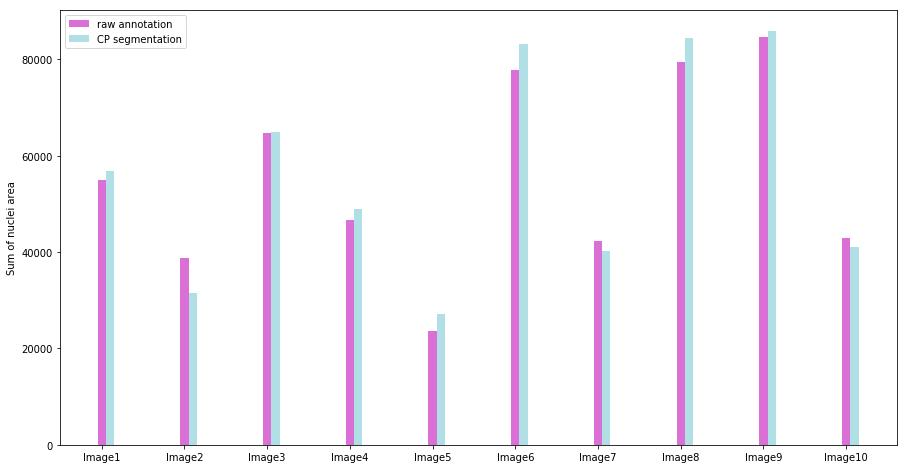

In [2]:
#Start with Nuclei

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

raw_area = []
df = pd.read_csv("/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Results_Pipelines_Images/Results/CSVs_For_Plotting_CellsAndNuclei_Validation/Nuclei_CPvsRaw/MyExpt_FilterObjects_png.csv")
image = df.ImageNumber.unique()
for i in range(len(image)):
    data = df.loc[df.ImageNumber == image[i]].reset_index()
    Areas = data.AreaShape_Area
    sum_area = Areas.sum()
    raw_area.append(sum_area)


df = pd.read_csv("/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Results_Pipelines_Images/Results/CSVs_For_Plotting_CellsAndNuclei_Validation/Nuclei_CPvsRaw/MyExpt_FilterObjects_C01.csv")

images = df.ImageNumber.unique()
cp_area = []
for i in range(len(images)):
    data = df.loc[df.ImageNumber == images[i]].reset_index()
    Areas = data.AreaShape_Area
    sum_area = Areas.sum()
    cp_area.append(sum_area)

    
im = ['Image1','Image2','Image3','Image4','Image5','Image6','Image7','Image8','Image9','Image10']
r = [0,1,2,3,4,5,6,7,8,9] 
width = 0.1

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
first_plot = ax.bar(np.arange(len(cp_area)), raw_area, width, color='orchid', label = 'raw annotation') 
second_plot = ax.bar(np.arange(len(cp_area))+width, cp_area, width, color='powderblue', label = 'CP segmentation')


plt.xticks(r, im, rotation = 0)
plt.legend(loc='best')
plt.ylabel('Sum of nuclei area')
plt.savefig('Nuclei_area_CPvsRawplot1.png');

plt.show();    
    




In [8]:
#plot nuclei area obtained from CP vs raw as histograms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df_png = pd.read_csv("/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Results_Pipelines_Images/Results/CSVs_For_Plotting_CellsAndNuclei_Validation/Nuclei_CPvsRaw/MyExpt_FilterObjects_png.csv")
out = open('step_AreaNuclei_png.csv', 'w')
print('Area', 'Step' , sep = ',', file = out)

images = df_png.ImageNumber.unique()
for i in range(len(images)):
    step_list= []
    data = df_png.loc[df_png.ImageNumber == images[i]].reset_index()
    area = data.AreaShape_Area
    for j in range(len(area)):
        step = 0
        while True:
            if data.AreaShape_Area[j] < step:
                step_list.append(step)
                break
            step = step+50
    for x in step_list:
        print(images[i],x, sep =',', file = out)
            

    

In [11]:
df_C01 = pd.read_csv("/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Results_Pipelines_Images/Results/CSVs_For_Plotting_CellsAndNuclei_Validation/Nuclei_CPvsRaw/MyExpt_FilterObjects_C01.csv")

out = open('step_AreaNuclei_C01.csv', 'w')
print('Area', 'Step' , sep = ',', file = out)

images = df_C01.ImageNumber.unique()
for i in range(len(images)):
    step_list= []
    data = df_C01.loc[df_C01.ImageNumber == images[i]].reset_index()
    area = data.AreaShape_Area
    for j in range(len(area)):
        step = 0
        while True:
            if data.AreaShape_Area[j] < step:
                step_list.append(step)
                break
            step = step+50
    for x in step_list:
        print(images[i],x, sep =',', file = out)

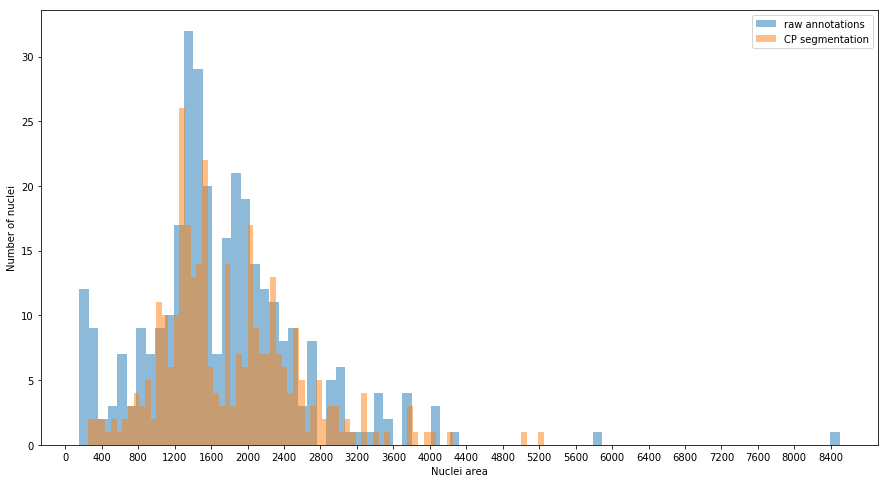

In [12]:
df_png = pd.read_csv("step_AreaNuclei_png.csv") 
df_C01 = pd.read_csv("step_AreaNuclei_C01.csv") 

step_png = df_png.Step
step_C01 = df_C01.Step

plt.rcParams["figure.figsize"] = (15,8) 
plt.hist(step_png, alpha = 0.5, bins = 80, label = 'raw annotations')
plt.hist(step_C01, bins = 80, alpha = 0.5, label = 'CP segmentation')

plt.xticks(np.arange(8800, step=400))
plt.xlabel('Nuclei area')
plt.ylabel('Number of nuclei')
plt.legend(loc='upper right')
plt.savefig('Nuclei_area_CPvsRaw.png');